In [1]:
import pandas as pd
import numpy as np

In [2]:
# membuka dataset
train = pd.read_csv('train.csv')
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
# komputasi tambahan untuk jumlah total paket, jumlah byte kolektif , dan rata-rata arrival time
total_pkts = train['spkts'] + train['dpkts']
combined_bytes = train['sbytes'] + train['dbytes']
mean_arv_time = (train['sinpkt'] + train['dinpkt'])/2


train['combined_bytes'] = combined_bytes
train['total_pkts'] = total_pkts
train['mean_arv_time'] = mean_arv_time

In [6]:
#implementasi model machine learning
knn = KNeighborsClassifier(n_neighbors=5)
X_train = train[['dur', 'sbytes', 'dbytes', 'combined_bytes', 'total_pkts', 'response_body_len', 'mean_arv_time']]
y_train = train['label']
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# pengaturan test dataset
test = pd.read_csv('train.csv')

total_pkts_test = test['spkts'] + test['dpkts']
combined_bytes_test = test['sbytes'] + test['dbytes']
mean_arv_time_test = (test['sinpkt'] + test['dinpkt'])/2

test['combined_bytes'] = combined_bytes_test
test['total_pkts'] = total_pkts_test
test['mean_arv_time'] = mean_arv_time_test

# melakukan percobaan pada test dataset
X_test = test[['dur', 'sbytes', 'dbytes', 'combined_bytes', 'total_pkts', 'response_body_len', 'mean_arv_time']]
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

# perbandingan dengan hasil aslinya
y_actual = test['label']
metrics.accuracy_score(y_actual, y_pred)

0.9400111742700287

In [17]:
res = []
for i in range(1, 11):
    print(i)
    K_test = KNeighborsClassifier(n_neighbors=i)
    K_test.fit(X_train, y_train)
    y_pred = K_test.predict(X_test)
    res.append(metrics.accuracy_score(y_actual, y_pred))

1
2
3
4
5
6
7
8
9
10
[0.9852062381577029, 0.9533352766846427, 0.9502502064810766, 0.9420759850361949, 0.9400111742700287, 0.9345697906038964, 0.9344118933100131, 0.9330636933391634, 0.9317519312053637, 0.9294077636884808]


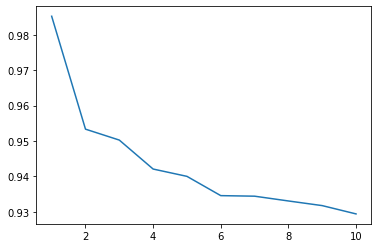

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), res)

In [39]:
avg = sum(res)/10
minimum = 1
min_index = 0
for i in range(0, 10):
    if (abs(res[i] - avg) < minimum):
        minimum = abs(res[i] - avg)
        min_index = i
print("K =", min_index + 1, "\nPercentage =", res[min_index]*100,"%")

K = 4 
Percentage = 94.2075985036195 %


In [8]:
import random

# load dataset
real = pd.read_csv('real.csv')

# pick random 500 samples
real = real.sample(n=500)

c:\users\salman\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
total_pkts_real = real['spkts'] + real['dpkts']
combined_bytes_real = real['sbytes'] + real['dbytes']
mean_arv_time_real = (real['sinpkt'] + real['dinpkt'])/2

real['combined_bytes'] = combined_bytes_real
real['total_pkts'] = total_pkts_real
real['mean_arv_time'] = mean_arv_time_real

# melakukan percobaan pada test dataset
X_real = real[['dur', 'sbytes', 'dbytes', 'combined_bytes', 'total_pkts', 'response_body_len', 'mean_arv_time']]
y_real = knn.predict(X_real)
y_real_prob = knn.predict_proba(X_real)

In [10]:
import matplotlib.pyplot as plt

app_view = real[['srcip', 'sport', 'dstip', 'dsport', 'label']]
app_view.label.dtype
app_view[app_view['label'] == 1]

,srcip,sport,dstip,dsport,label
87192,175.45.176.1,0,149.171.126.12,0,1
132160,175.45.176.1,47439,149.171.126.18,53,1
138642,175.45.176.1,47439,149.171.126.18,53,1
106601,175.45.176.1,47439,149.171.126.18,53,1
82242,175.45.176.1,0,149.171.126.12,0,1
159398,175.45.176.3,0,149.171.126.10,0,1
100898,175.45.176.1,10487,149.171.126.15,40007,1
162904,175.45.176.0,63033,149.171.126.13,25,1
82505,175.45.176.1,0,149.171.126.12,0,1
155153,175.45.176.1,51718,149.171.126.12,80,1


In [11]:
app_view2 = real.loc[:, ('srcip', 'sport', 'dstip', 'dsport')]
app_view2['label'] = y_real

new_prob = []
for i in range(0, 500):
    a = (y_real_prob[i, 0] if (y_real_prob[i, 0] >= y_real_prob[i, 1]) else y_real_prob[i, 1])
    new_prob.append(a)
# new_prob
app_view2['probability'] = new_prob

In [12]:
app_view2.head()

,srcip,sport,dstip,dsport,label,probability
287991,59.166.0.2,38142,149.171.126.6,44718,0,1.0
121084,59.166.0.0,35680,149.171.126.9,80,0,1.0
260675,59.166.0.9,33005,149.171.126.4,28225,0,1.0
375850,59.166.0.6,50383,149.171.126.2,46800,0,1.0
315207,59.166.0.1,25041,149.171.126.4,80,0,1.0


In [14]:
app_view2[(app_view2.label == 1) & (app_view2.probability == 1)]

,srcip,sport,dstip,dsport,label,probability
87192,175.45.176.1,0,149.171.126.12,0,1,1.0
22492,175.45.176.1,8259,149.171.126.17,179,1,1.0
132160,175.45.176.1,47439,149.171.126.18,53,1,1.0
138642,175.45.176.1,47439,149.171.126.18,53,1,1.0
569635,59.166.0.0,18470,149.171.126.9,6881,1,1.0
106601,175.45.176.1,47439,149.171.126.18,53,1,1.0
276926,59.166.0.5,59853,149.171.126.7,5190,1,1.0
69440,59.166.0.9,40691,149.171.126.4,5190,1,1.0
187721,149.171.126.1,27902,59.166.0.1,27056,1,1.0
82242,175.45.176.1,0,149.171.126.12,0,1,1.0
